## Q: What are the predictors for learners who stay at beginner or letter level even after one or two cycles of intervention? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns



from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('data/merged_Uganda_with_additional.csv', index_col=0)
df.head()

/var/folders/_f/s0xx4_bj711c1h8k9b5vjhgm0000gn/T/ipykernel_94005/3957317120.py:1: DtypeWarning: Columns (35,36,37,38,39,40,41,42,43,44,45,46,47,48,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/merged_Uganda_with_additional.csv', index_col=0)


,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Baseline to Endline,Completing Result Baseline to Endline-Story/Comprehension Level,AtLeastAchievedSentence,...,IsCUCSatisfied?,WillingnessInCUC?,PrimaryCareGiver,SafeAtSchool,SafeAtHome,LastCuCCycleStatus,ReadingAssessmentsRecords,Project,AssessmentResultAchieved,Disability
0,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,9.0,Very Likely,NaN,NaN,NaN,NaN,80028.0,Hempel,Story with comprehension,Without Disability
1,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,9.0,Not Likely,NaN,NaN,NaN,NaN,80579.0,Hempel,Beginner,Without Disability
2,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,9.0,Very Likely,NaN,NaN,NaN,NaN,81745.0,Hempel,Story with comprehension,Without Disability
3,36161,Word,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,0.0,NaN,Father,NaN,NaN,NaN,79224.0,Hempel,Word,Without Disability
4,31440,Letter,NaN,Story with comprehension,Story with comprehension,NaN,NaN,Increase,True,True,...,8.0,Very Likely,NaN,NaN,NaN,NaN,85543.0,Hempel,Story with comprehension,Without Disability


In [3]:
# 
df[((df.ResultEndline=='Beginner') | (df.ResultEndline=='Letter')) & 
   (df.Project=='Baana')]

# 2449 student stay at beginner or letter level even after one or two cycles of intervention

,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Baseline to Endline,Completing Result Baseline to Endline-Story/Comprehension Level,AtLeastAchievedSentence,...,IsCUCSatisfied?,WillingnessInCUC?,PrimaryCareGiver,SafeAtSchool,SafeAtHome,LastCuCCycleStatus,ReadingAssessmentsRecords,Project,AssessmentResultAchieved,Disability
9407,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,0.0,Likely,NaN,NaN,NaN,NaN,9312.0,Baana,Letter,Without Disability
9408,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,0.0,NaN,NaN,NaN,NaN,NaN,10820.0,Baana,Sentence,Without Disability
9409,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,0.0,NaN,NaN,NaN,NaN,NaN,11374.0,Baana,Letter,Without Disability
9410,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,0.0,NaN,NaN,NaN,NaN,NaN,12545.0,Baana,Sentence,Without Disability
9411,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,0.0,NaN,NaN,NaN,NaN,NaN,12974.0,Baana,Word,Without Disability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23139,26194,Letter,Letter,Letter,Beginner,Stayed The Same,Stayed The Same,Decrease,False,False,...,10.0,Very Likely,NaN,NaN,NaN,NaN,17791.0,Baana,Letter,Without Disability
23258,21958,Word,Word,Sentence,Letter,Stayed The Same,Increase,Decrease,False,False,...,10.0,VeryLikely,NaN,NaN,NaN,NaN,14774.0,Baana,Letter,With Disability
23259,21958,Word,Word,Sentence,Letter,Stayed The Same,Increase,Decrease,False,False,...,0.0,NaN,NaN,NaN,NaN,NaN,18353.0,Baana,Word,Without Disability
23260,21958,Word,Word,Sentence,Letter,Stayed The Same,Increase,Decrease,False,False,...,8.0,Likely,NaN,NaN,NaN,NaN,15877.0,Baana,Sentence,Without Disability


In [4]:
# filter by Baana project
df = df[ (df.Project=='Baana')]
# new target column: if learners level is beginner or letter: 1
# otherwise 0
df['target'] = df.ResultEndline.apply(lambda x: 1 if x=='Beginner' or x == 'Letter' else 0)
df

,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Baseline to Endline,Completing Result Baseline to Endline-Story/Comprehension Level,AtLeastAchievedSentence,...,WillingnessInCUC?,PrimaryCareGiver,SafeAtSchool,SafeAtHome,LastCuCCycleStatus,ReadingAssessmentsRecords,Project,AssessmentResultAchieved,Disability,target
9407,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,Likely,NaN,NaN,NaN,NaN,9312.0,Baana,Letter,Without Disability,1
9408,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,NaN,NaN,NaN,NaN,NaN,10820.0,Baana,Sentence,Without Disability,1
9409,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,NaN,NaN,NaN,NaN,NaN,11374.0,Baana,Letter,Without Disability,1
9410,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,NaN,NaN,NaN,NaN,NaN,12545.0,Baana,Sentence,Without Disability,1
9411,26533,Sentence,Word,Sentence,Letter,Decrease,Increase,Decrease,False,True,...,NaN,NaN,NaN,NaN,NaN,12974.0,Baana,Word,Without Disability,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23269,25884,Sentence,Sentence,Sentence,Sentence,Stayed The Same,Stayed The Same,Stayed The Same,False,True,...,Very Likely,NaN,NaN,NaN,NaN,17740.0,Baana,Sentence,Without Disability,0
23270,25884,Sentence,Sentence,Sentence,Sentence,Stayed The Same,Stayed The Same,Stayed The Same,False,True,...,VeryLikely,NaN,NaN,NaN,NaN,14815.0,Baana,Sentence,Without Disability,0
23271,25884,Sentence,Sentence,Sentence,Sentence,Stayed The Same,Stayed The Same,Stayed The Same,False,True,...,NaN,NaN,NaN,NaN,NaN,19592.0,Baana,Sentence,Without Disability,0
23272,25884,Sentence,Sentence,Sentence,Sentence,Stayed The Same,Stayed The Same,Stayed The Same,False,True,...,Likely,NaN,NaN,NaN,NaN,16497.0,Baana,Sentence,Without Disability,0


###  Correlation analysis

In [6]:
from sklearn.preprocessing import OrdinalEncoder
def unique_vals(df, only_categorical_cols = False, only_object = False):
    res = pd.DataFrame()
    cols = []
    nunique = []
    unique = []
    datatype = []
    num_of_nan = []
    for column in df:
        cols.append(column)
        nunique.append(df[column].nunique() )
        unique.append( df[column].unique() )
        datatype.append(df[column].dtype)
        num_of_nan.append(df[column].isnull().sum())
        
    
    res['col_name'] = cols
    res['number_of_unique_values'] = nunique
    res['unique_values'] = unique
    res['dtype'] = datatype
    res['number_of_nan'] = num_of_nan

    if only_categorical_cols and only_object:
        res = res[res['dtype']=='object']
        return res[res['number_of_unique_values']<500].sort_values('number_of_unique_values')

    if only_categorical_cols:
        return res[res['number_of_unique_values']<500].sort_values('number_of_unique_values')

    if only_object:
        return res[res['dtype']=='object'].sort_values('number_of_unique_values')


    return res.sort_values('number_of_unique_values')

cols_drop = ['AcademicYearName', 'Project', 'BaselineClass',
                'Baseline_Endline', 'ResultEndline',
                'StoryAchieved', 'ComprehensionAchieved', 'Completing Result Baseline to Endline-Story/Comprehension Level',
                 'AtLeastAchievedSentence',
                 'FloorMaterial', 'RoofMaterial','WallMaterial', 'IsRadioTVAvailable?',
                 'IsTelephoneAvailable?', 'IsBikeAvailable?',  'MemoryConcentration', 'Selfcare',
                'CommunicationIssue', 'Vision', 'SafeAtHome', 'ClassID', 'LastCuCCycleStatus', 'SchoolID', 'SafeAtSchool',
                'Safety Status Category', "Hearing"]
cleaned_df = df.drop(cols_drop, axis=1)
object_columns = unique_vals(cleaned_df,  True, True).col_name.values
# encode categorical columns to numbers
ordinal_encoder = OrdinalEncoder()
cleaned_df.loc[:, object_columns] = ordinal_encoder.fit_transform(cleaned_df[object_columns])
cleaned_df.fillna(0, inplace=True)

/var/folders/_f/s0xx4_bj711c1h8k9b5vjhgm0000gn/T/ipykernel_94005/3972770105.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df.fillna(0, inplace=True)


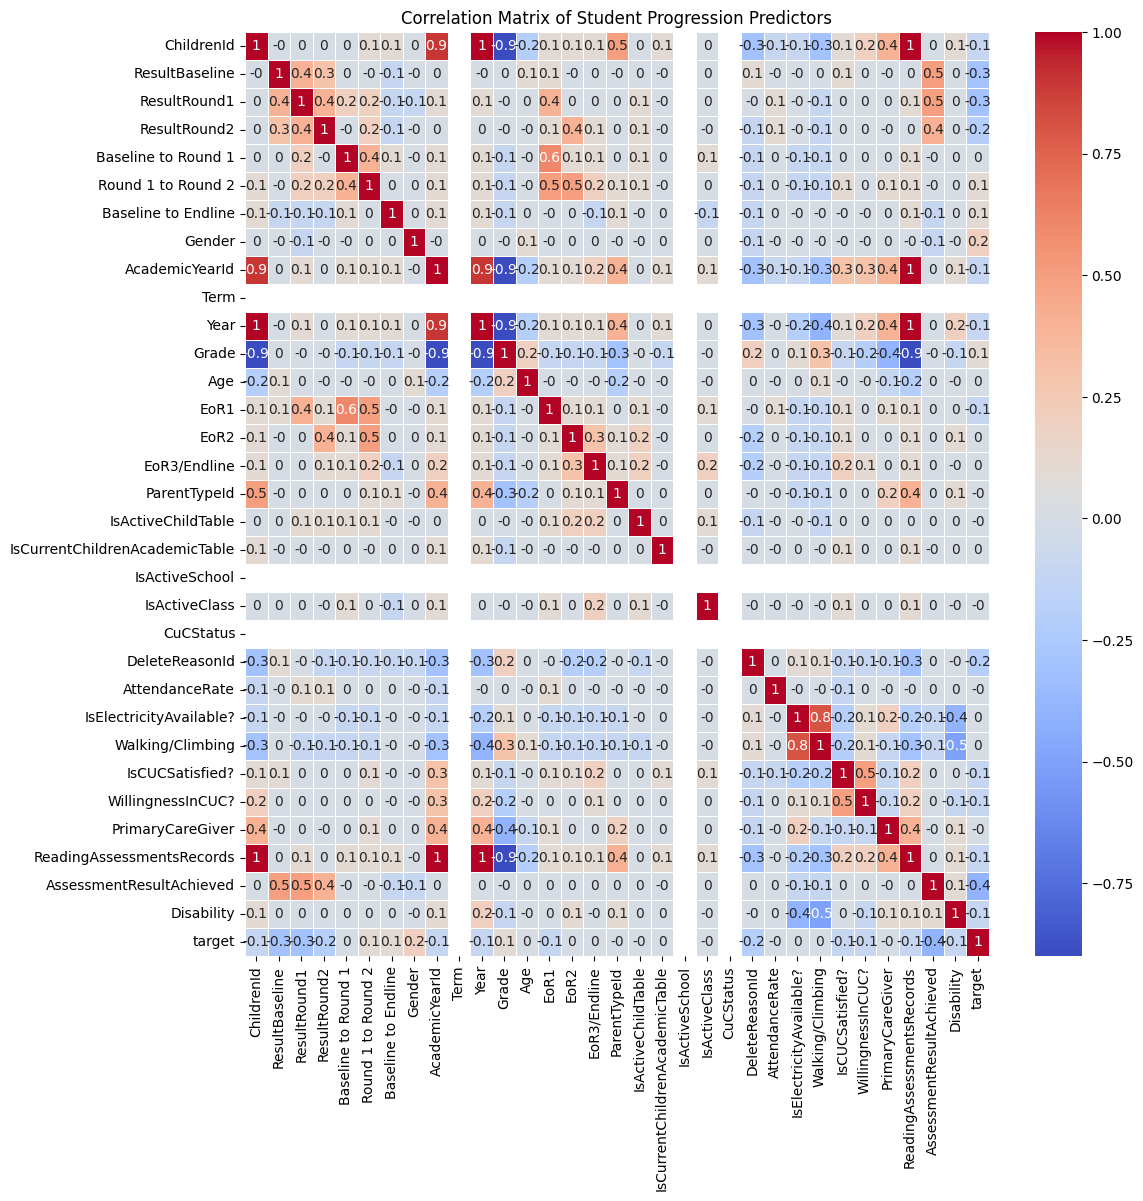

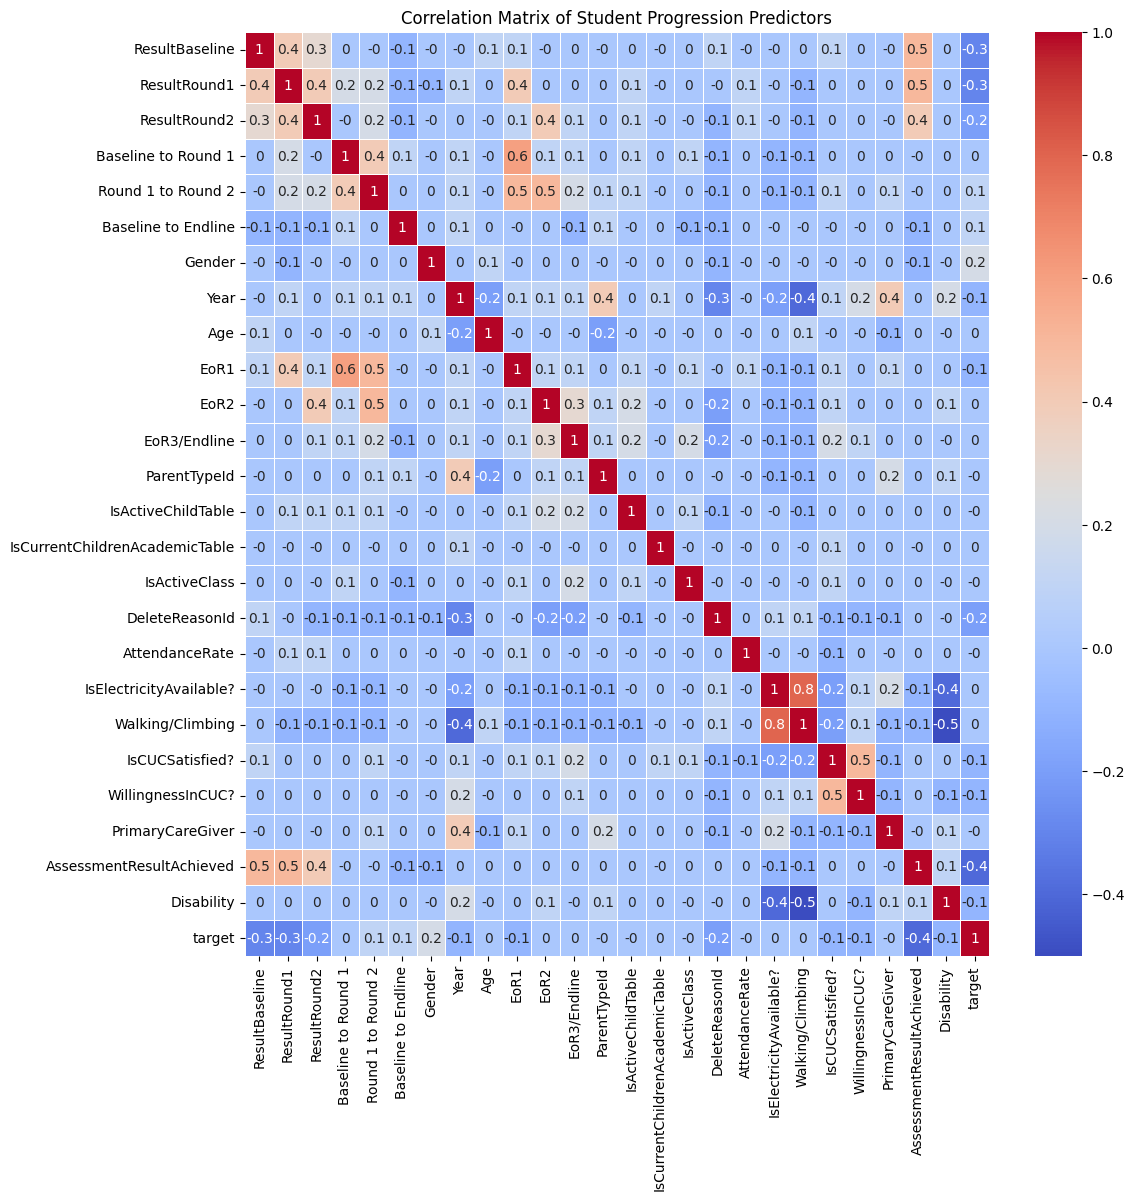

In [7]:

corr_matrix = cleaned_df.corr().round(1)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Student Progression Predictors')
plt.show()

corr_matrix =  cleaned_df.drop(['ChildrenId', 'Grade', 'CuCStatus', 'IsActiveSchool', 'Term', 
             'AcademicYearId', 'ReadingAssessmentsRecords'], axis=1).corr().round(1)

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Student Progression Predictors')
plt.show()

In [8]:
# feature values for All learners' is not given
print(df.SafeAtSchool.value_counts())
print(df.SafeAtHome.value_counts())
print(df.LastCuCCycleStatus.value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


###  Log reg feature importance

In [9]:
# Prepare features (X) and target (y)
y = cleaned_df['target'].astype(int)
X = cleaned_df.drop(['ChildrenId', 'Grade', 'CuCStatus', 'IsActiveSchool', 'Term', 
             'AcademicYearId', 'ReadingAssessmentsRecords', 'target', 'Baseline to Endline', 'AssessmentResultAchieved'], axis=1)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shape of train and test data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (7370, 23), X_test shape: (1843, 23)
y_train shape: (7370,), y_test shape: (1843,)


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1365
           1       0.69      0.49      0.57       478

    accuracy                           0.81      1843
   macro avg       0.76      0.71      0.72      1843
weighted avg       0.80      0.81      0.80      1843



/Users/assylnur/Desktop/BU/Fall2024/DS701_tools4ds/Spark/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


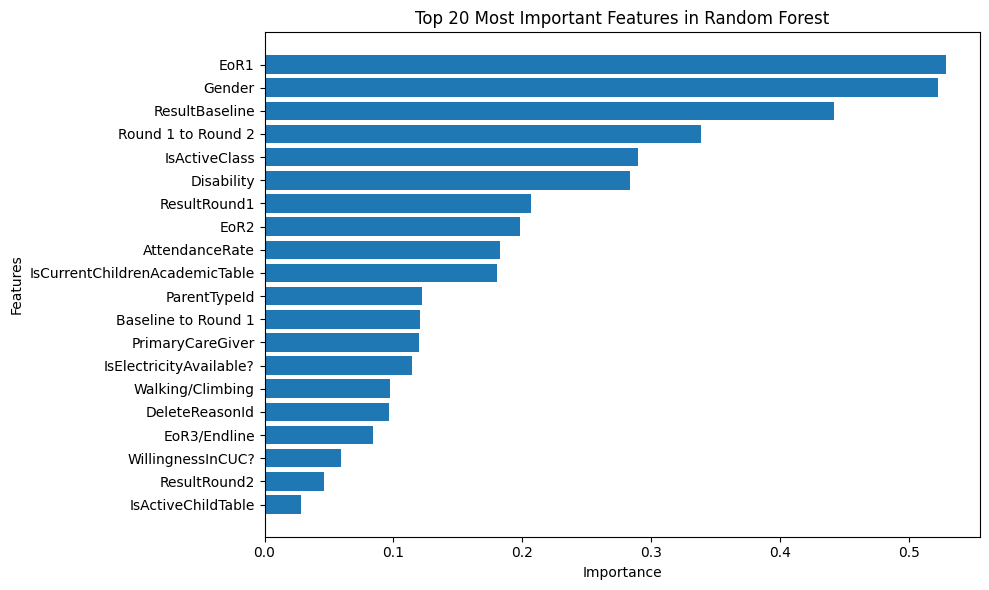

In [11]:
# Extract feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of the coefficients to see importance
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the top 20 features
N = 20
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(N), feature_importance['Importance'].head(N),)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Top {N} Most Important Features in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

###  Random Forest Feature importance

In [12]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1365
           1       0.89      0.84      0.87       478

    accuracy                           0.93      1843
   macro avg       0.92      0.90      0.91      1843
weighted avg       0.93      0.93      0.93      1843



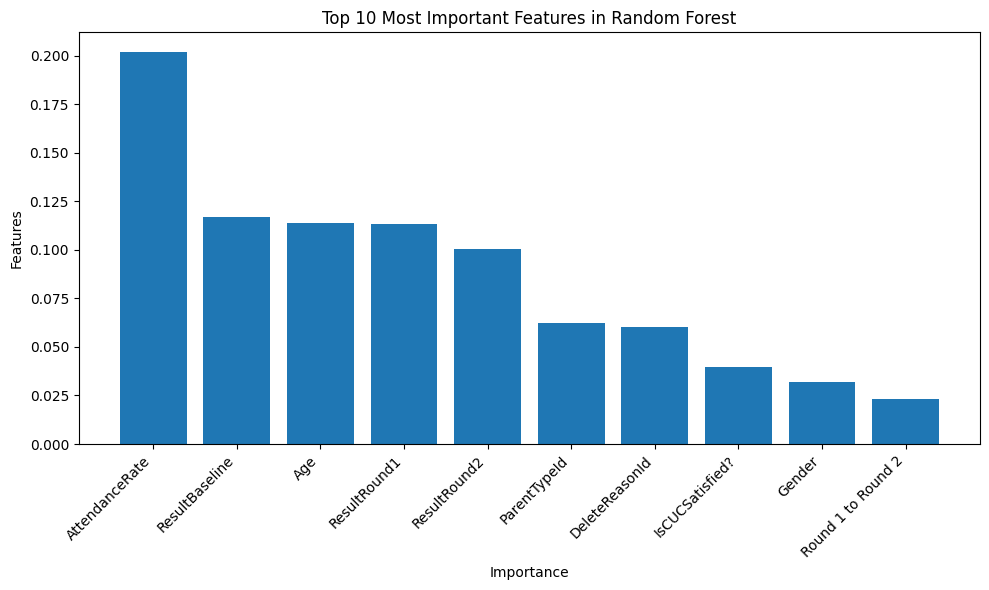

In [13]:
# Get feature importance from the trained model
feature_importance = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


# Plot the top 20 features
N = 10
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'].head(N), feature_importance_df['Importance'].head(N))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Top {N} Most Important Features in Random Forest')
# plt.gca().invert_yaxis()  # Highest importance at the top
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.tight_layout()
plt.show()
